In [32]:
import qiskit
from qiskit.circuit import Clbit
from qiskit import QuantumCircuit as qc
from qiskit import  ClassicalRegister, QuantumRegister
import qiskit_ibm_runtime
from qiskit_ibm_runtime import QiskitRuntimeService
import qiskit_aer
from qiskit import transpile
from qiskit.circuit.library import MCXGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
print(qiskit.__version__)
print(qiskit_ibm_runtime.__version__)
print(qiskit_aer.__version__)

1.1.0
0.23.0
0.14.1


Question 0:
The arguments $(x_0, x_1, x_2, x_3, x_4)$ such as $f(x_0, x_1, x_2, x_3, x_4) = 1$, that were found using a three scheme, are: 
$$
\{(01010), (00010), (11010)\}.
$$

Question 1:
The state preparation consists into applying a Hadamard gate to every principal entry bit to the circuit, excluding the ancilla bits that will be used for the AND and OR quantum gates. In our implementation, the firsts five qubits corresponds to $(x_0, x_1, x_2, x_3, x_4)$; the $y$ qubit is q_11; while the qubits from q_5 to q_10 are ancilla bits used by the quantum implementation of the OR and AND gates. The preparation circuit is the following:

In [28]:
Init = qc(12)
Init.h(0)
Init.h(1)
Init.h(2)
Init.h(3)
Init.h(4)
Init.x(11)
Init.h(11)
Init.draw()

┌───┐     
 q_0: ┤ H ├─────
      ├───┤     
 q_1: ┤ H ├─────
      ├───┤     
 q_2: ┤ H ├─────
      ├───┤     
 q_3: ┤ H ├─────
      ├───┤     
 q_4: ┤ H ├─────
      └───┘     
 q_5: ──────────
                
 q_6: ──────────
                
 q_7: ──────────
                
 q_8: ──────────
                
 q_9: ──────────
                
q_10: ──────────
      ┌───┐┌───┐
q_11: ┤ X ├┤ H ├
      └───┘└───┘

Question 2: The oracle is implemented below, making use of the MCXGate() function to get CNOT gates with more than two control bits. Initially we implemented out version of those gates, but it used more ancilla bits and we tought the circuit were less readable.

In [29]:
Oracle = qc(12)
#realization of the Oracle
Oracle.x(5)
Oracle.x(6)
Oracle.x(7)
Oracle.x(8)
Oracle.x(9)
Oracle.x(10)
Oracle.ccx(3,4,9)
Oracle.x(2)
Oracle.x(3)
Oracle.ccx(2,3,7)
Oracle.x(1)
Oracle.ccx(0,1,5)
gate = MCXGate(3)
Oracle.x(0)
Oracle.x(2)
Oracle.append(gate, [0, 1, 2, 6])
Oracle.x(1)
Oracle.append(gate, [1, 2, 3, 8])
Oracle.x(3)
Oracle.x(4)
Oracle.append(gate, [2, 3, 4, 10])
gate6 = MCXGate(6)
Oracle.append(gate6, [5, 6, 7, 8, 9, 10, 11])
#Going back to original states

Oracle.x(0)
Oracle.x(4)
Oracle.ccx(3,4,9)
Oracle.x(2)
Oracle.x(3)
Oracle.ccx(2,3,7)
Oracle.x(1)
Oracle.ccx(0,1,5)
gate = MCXGate(3)
Oracle.x(0)
Oracle.x(2)
Oracle.append(gate, [0, 1, 2, 6])
Oracle.x(1)
Oracle.append(gate, [1, 2, 3, 8])
Oracle.x(3)
Oracle.x(4)
Oracle.append(gate, [2, 3, 4, 10])
Oracle.x(5)
Oracle.x(6)
Oracle.x(7)
Oracle.x(8)
Oracle.x(9)
Oracle.x(10)
Oracle.x(0)
Oracle.x(4)
Oracle.draw()

┌───┐               ┌───┐                              »
 q_0: ────────────■──┤ X ├────────────■──┤ X ├───────────────────────────■──»
      ┌───┐       │  └───┘            │  ├───┤     ┌───┐                 │  »
 q_1: ┤ X ├───────■───────────────────■──┤ X ├──■──┤ X ├─────────────────■──»
      ├───┤       │            ┌───┐  │  └───┘  │  └───┘     ┌───┐       │  »
 q_2: ┤ X ├───────┼─────────■──┤ X ├──■─────────■─────────■──┤ X ├───────┼──»
      └───┘       │  ┌───┐  │  └───┘  │         │  ┌───┐  │  └───┘       │  »
 q_3: ───────■────┼──┤ X ├──■─────────┼─────────■──┤ X ├──■─────────■────┼──»
             │    │  ├───┤  │         │         │  └───┘  │  ┌───┐  │    │  »
 q_4: ───────■────┼──┤ X ├──┼─────────┼─────────┼─────────■──┤ X ├──■────┼──»
      ┌───┐  │  ┌─┴─┐└───┘  │         │         │         │  └───┘  │  ┌─┴─┐»
 q_5: ┤ X ├──┼──┤ X ├───────┼─────────┼─────────┼─────────┼────■────┼──┤ X ├»
      ├───┤  │  └───┘       │       ┌─┴─┐       │         │    │    │  └───┘»
 q_6: ┤ X ├──┼──────────────┼───────┤ X ├───────┼─────────┼────■────┼───────»
      ├───┤  │            ┌─┴─┐     └───┘       │         │    │    │       »
 q_7: ┤ X ├──┼────────────┤ X ├─────────────────┼─────────┼────■────┼───────»
      ├───┤  │            └───┘               ┌─┴─┐       │    │    │       »
 q_8: ┤ X ├──┼────────────────────────────────┤ X ├───────┼────■────┼───────»
      ├───┤┌─┴─┐                              └───┘       │    │  ┌─┴─┐┌───┐»
 q_9: ┤ X ├┤ X ├──────────────────────────────────────────┼────■──┤ X ├┤ X ├»
      ├───┤└───┘                                        ┌─┴─┐  │  └───┘└───┘»
q_10: ┤ X ├─────────────────────────────────────────────┤ X ├──■────────────»
      └───┘                                             └───┘┌─┴─┐          »
q_11: ───────────────────────────────────────────────────────┤ X ├──────────»
                                                             └───┘          »
«      ┌───┐               ┌───┐                    
« q_0: ┤ X ├────────────■──┤ X ├────────────────────
«      └───┘            │  ├───┤                    
« q_1: ─────────────────■──┤ X ├──■─────────────────
«                ┌───┐  │  └───┘  │                 
« q_2: ───────■──┤ X ├──■─────────■─────────■───────
«      ┌───┐  │  └───┘  │         │  ┌───┐  │       
« q_3: ┤ X ├──■─────────┼─────────■──┤ X ├──■───────
«      ├───┤  │         │         │  └───┘  │  ┌───┐
« q_4: ┤ X ├──┼─────────┼─────────┼─────────■──┤ X ├
«      ├───┤  │         │         │         │  └───┘
« q_5: ┤ X ├──┼─────────┼─────────┼─────────┼───────
«      └───┘  │       ┌─┴─┐┌───┐  │         │       
« q_6: ───────┼───────┤ X ├┤ X ├──┼─────────┼───────
«           ┌─┴─┐┌───┐└───┘└───┘  │         │       
« q_7: ─────┤ X ├┤ X ├────────────┼─────────┼───────
«           └───┘└───┘          ┌─┴─┐┌───┐  │       
« q_8: ─────────────────────────┤ X ├┤ X ├──┼───────
«                               └───┘└───┘  │       
« q_9: ─────────────────────────────────────┼───────
«                                         ┌─┴─┐┌───┐
«q_10: ───────────────────────────────────┤ X ├┤ X ├
«                                         └───┘└───┘
«q_11: ─────────────────────────────────────────────
«

Question 3: The reflection gate R, that reflects the state around psi_0, is implemented below:

In [30]:
Reflection = qc(12)
Reflection.h(0)
Reflection.h(1)
Reflection.h(2)
Reflection.h(3)
Reflection.h(4)
Reflection.x(4)
Reflection.h(4)
Reflection.x(0)
Reflection.x(1)
Reflection.x(2)
Reflection.x(3)
gate4 = MCXGate(4)
Reflection.append(gate4, [0,1, 2, 3, 4])
Reflection.h(4)
Reflection.x(0)
Reflection.x(1)
Reflection.x(2)
Reflection.x(3)
Reflection.x(4)
Reflection.h(0)
Reflection.h(1)
Reflection.h(2)
Reflection.h(3)
Reflection.h(4)
Reflection.draw()

┌───┐┌───┐          ┌───┐┌───┐     
 q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
      ├───┤├───┤       │  ├───┤├───┤     
 q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
      ├───┤├───┤       │  ├───┤├───┤     
 q_2: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
      ├───┤├───┤       │  ├───┤├───┤     
 q_3: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
      ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
 q_4: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
      └───┘└───┘└───┘└───┘└───┘└───┘└───┘
 q_5: ───────────────────────────────────
                                         
 q_6: ───────────────────────────────────
                                         
 q_7: ───────────────────────────────────
                                         
 q_8: ───────────────────────────────────
                                         
 q_9: ───────────────────────────────────
                                         
q_10: ───────────────────────────────────
                                         
q_11: ───────────────────────────────────

Question 4: for each value of $k \in {1, 2, 3}$ we run an ideal simulation of the circuit and a simulation with the noise model from an IBM machine. Firstly let's compose the circuits:

In [34]:
#Creation of the Grover's operator
Grover = Oracle.compose(Reflection)

#Composition of the circuits with k = 1, 2, 3.
Circ_grov_k1 = Init.compose(Grover)
Circ_grov_k2 = Circ_grov_k1.compose(Grover) 
Circ_grov_k3 = Circ_grov_k2.compose(Grover) 
Circ_grov_k4 = Circ_grov_k3.compose(Grover) 

Circ_grov_k1.barrier()
Circ_grov_k2.barrier()
Circ_grov_k3.barrier()
Circ_grov_k4.barrier()

cr1 = ClassicalRegister(5)
cr2 = ClassicalRegister(5)
cr3 = ClassicalRegister(5)
cr4 = ClassicalRegister(5)

Circ_grov_k1.add_register(cr1)
Circ_grov_k2.add_register(cr2)
Circ_grov_k3.add_register(cr3)
Circ_grov_k4.add_register(cr4)
#Measurements
Circ_grov_k1.measure([0,1,2,3,4], cr1)
Circ_grov_k2.measure([0,1,2,3,4], cr2)
Circ_grov_k3.measure([0,1,2,3,4], cr3)
Circ_grov_k4.measure([0,1,2,3,4], cr4)
Circ_grov_k1.draw()

┌───┐               ┌───┐          ┌───┐                              »
 q_0: ┤ H ├────────────■──┤ X ├───────■──┤ X ├───────────────────────────■──»
      ├───┤┌───┐       │  └───┘       │  ├───┤     ┌───┐                 │  »
 q_1: ┤ H ├┤ X ├───────■──────────────■──┤ X ├──■──┤ X ├─────────────────■──»
      ├───┤├───┤       │       ┌───┐  │  └───┘  │  └───┘     ┌───┐       │  »
 q_2: ┤ H ├┤ X ├───────┼────■──┤ X ├──■─────────■─────────■──┤ X ├───────┼──»
      ├───┤└───┘┌───┐  │    │  └───┘  │         │  ┌───┐  │  └───┘       │  »
 q_3: ┤ H ├──■──┤ X ├──┼────■─────────┼─────────■──┤ X ├──■─────────■────┼──»
      ├───┤  │  ├───┤  │    │         │         │  └───┘  │  ┌───┐  │    │  »
 q_4: ┤ H ├──■──┤ X ├──┼────┼─────────┼─────────┼─────────■──┤ X ├──■────┼──»
      ├───┤  │  └───┘┌─┴─┐  │         │         │         │  └───┘  │  ┌─┴─┐»
 q_5: ┤ X ├──┼───────┤ X ├──┼─────────┼─────────┼─────────┼────■────┼──┤ X ├»
      ├───┤  │       └───┘  │       ┌─┴─┐       │         │    │    │  └───┘»
 q_6: ┤ X ├──┼──────────────┼───────┤ X ├───────┼─────────┼────■────┼───────»
      ├───┤  │            ┌─┴─┐     └───┘       │         │    │    │       »
 q_7: ┤ X ├──┼────────────┤ X ├─────────────────┼─────────┼────■────┼───────»
      ├───┤  │            └───┘               ┌─┴─┐       │    │    │       »
 q_8: ┤ X ├──┼────────────────────────────────┤ X ├───────┼────■────┼───────»
      ├───┤┌─┴─┐                              └───┘       │    │  ┌─┴─┐┌───┐»
 q_9: ┤ X ├┤ X ├──────────────────────────────────────────┼────■──┤ X ├┤ X ├»
      ├───┤└───┘                                        ┌─┴─┐  │  └───┘└───┘»
q_10: ┤ X ├─────────────────────────────────────────────┤ X ├──■────────────»
      ├───┤┌───┐                                        └───┘┌─┴─┐          »
q_11: ┤ X ├┤ H ├─────────────────────────────────────────────┤ X ├──────────»
      └───┘└───┘                                             └───┘          »
c0: 5/══════════════════════════════════════════════════════════════════════»
                                                                            »
«      ┌───┐               ┌───┐┌───┐┌───┐                              ┌───┐»
« q_0: ┤ X ├────────────■──┤ X ├┤ H ├┤ X ├───────────────────────────■──┤ X ├»
«      └───┘            │  ├───┤└───┘├───┤┌───┐                      │  ├───┤»
« q_1: ─────────────────■──┤ X ├──■──┤ H ├┤ X ├──────────────────────■──┤ X ├»
«                ┌───┐  │  └───┘  │  └───┘└───┘┌───┐┌───┐            │  ├───┤»
« q_2: ───────■──┤ X ├──■─────────■─────────■──┤ H ├┤ X ├────────────■──┤ X ├»
«      ┌───┐  │  └───┘  │         │  ┌───┐  │  ├───┤├───┤            │  ├───┤»
« q_3: ┤ X ├──■─────────┼─────────■──┤ X ├──■──┤ H ├┤ X ├────────────■──┤ X ├»
«      ├───┤  │         │         │  └───┘  │  ├───┤├───┤┌───┐┌───┐┌─┴─┐├───┤»
« q_4: ┤ X ├──┼─────────┼─────────┼─────────■──┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├»
«      ├───┤  │         │         │         │  └───┘└───┘└───┘└───┘└───┘└───┘»
« q_5: ┤ X ├──┼─────────┼─────────┼─────────┼────────────────────────────────»
«      └───┘  │       ┌─┴─┐┌───┐  │         │                                »
« q_6: ───────┼───────┤ X ├┤ X ├──┼─────────┼────────────────────────────────»
«           ┌─┴─┐┌───┐└───┘└───┘  │         │                                »
« q_7: ─────┤ X ├┤ X ├────────────┼─────────┼────────────────────────────────»
«           └───┘└───┘          ┌─┴─┐┌───┐  │                                »
« q_8: ─────────────────────────┤ X ├┤ X ├──┼────────────────────────────────»
«                               └───┘└───┘  │                                »
« q_9: ─────────────────────────────────────┼────────────────────────────────»
«                                         ┌─┴─┐┌───┐                         »
«q_10: ───────────────────────────────────┤ X ├┤ X ├─────────────────────────»
«                                         └───┘└───┘                         »
«q_11: ──────────────────────────────────────────────────────────────────────»
«   

For each circuit we start by running an ideal simulation:

k = 1:


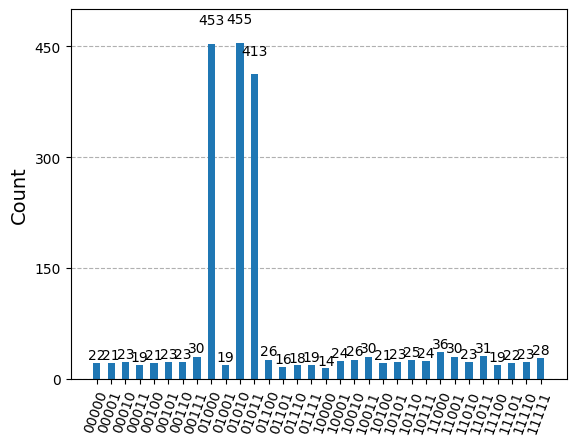

In [35]:
sim_ideal = AerSimulator()
job_ideal_k1 = sim_ideal.run(Circ_grov_k1, shots=2000)
job_ideal_k1_res = job_ideal_k1.result()
job_ideal_k1_count = job_ideal_k1_res.get_counts()
print("k = 1:")
plot_histogram(job_ideal_k1_count)

k = 2:


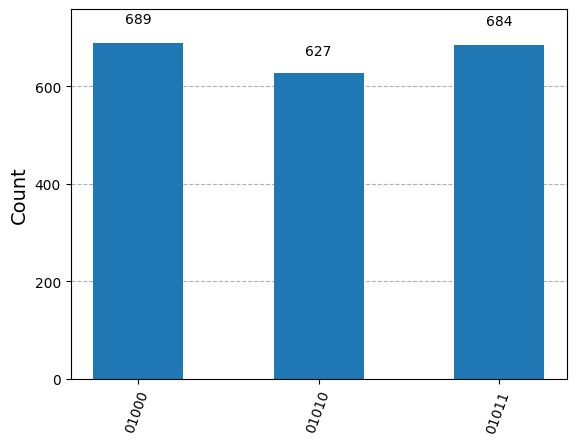

In [36]:
job_ideal_k2 = sim_ideal.run(Circ_grov_k2, shots=2000)
job_ideal_k2_res = job_ideal_k2.result()
job_ideal_k2_count = job_ideal_k2_res.get_counts()
print("k = 2:")
plot_histogram(job_ideal_k2_count)

k = 3:


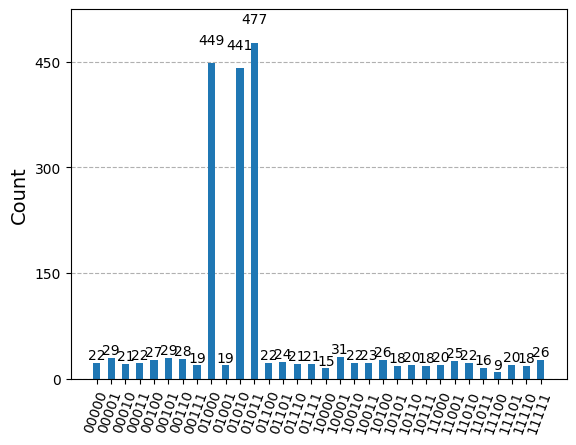

In [37]:
job_ideal_k3 = sim_ideal.run(Circ_grov_k3, shots=2000)
job_ideal_k3_res = job_ideal_k3.result()
job_ideal_k3_count = job_ideal_k3_res.get_counts()
print("k = 3:")
plot_histogram(job_ideal_k3_count)

k = 4:


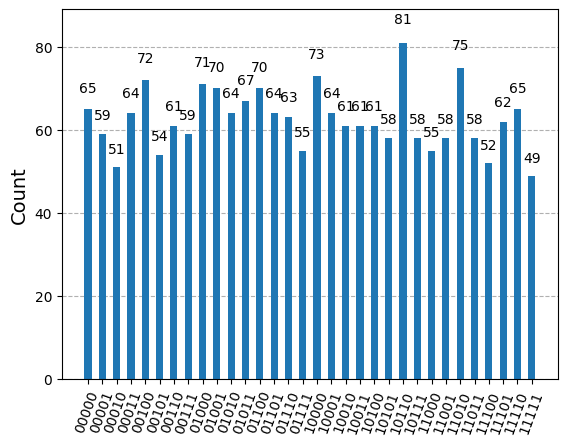

In [38]:
job_ideal_k4 = sim_ideal.run(Circ_grov_k4, shots=2000)
job_ideal_k4_res = job_ideal_k4.result()
job_ideal_k4_count = job_ideal_k4_res.get_counts()
print("k = 4:")
plot_histogram(job_ideal_k4_count)

The plots show clearly that k=2 is the best solution for this problem, with a nearly perfect result, whereas k=1 and k=3 still gives concluants results but with some noise due to the algorithm. For the case k=4, the noise become to big and we cannot conclude anything. Thus we will try next to simulate the noise of a real quantum computer on this circuit for k=1,2,3. 

In [39]:

service = QiskitRuntimeService()
# Backend simulator
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=3)
print(backend)
osaka_sim = AerSimulator.from_backend(backend)

<IBMBackend('ibm_osaka')>


In [20]:
# Transpilation of the circuits
transpiled_k1= transpile(Circ_grov_k1, backend)
transpiled_k2= transpile(Circ_grov_k2, backend)
transpiled_k3= transpile(Circ_grov_k3, backend)

job_sim_k1 = osaka_sim.run(transpiled_k1, shots=200, seed_simulator=40)
job_sim_k2 = osaka_sim.run(transpiled_k2, shots=200 , seed_simulator=40)
job_sim_k3 = osaka_sim.run(transpiled_k3, shots=200, seed_simulator=40)

result_sim_k1 = job_sim_k1.result()
result_sim_k2 = job_sim_k2.result()
result_sim_k3 = job_sim_k3.result()

counts_sim_k1 = result_sim_k1.get_counts()
counts_sim_k2 = result_sim_k2.get_counts()
counts_sim_k3 = result_sim_k3.get_counts()

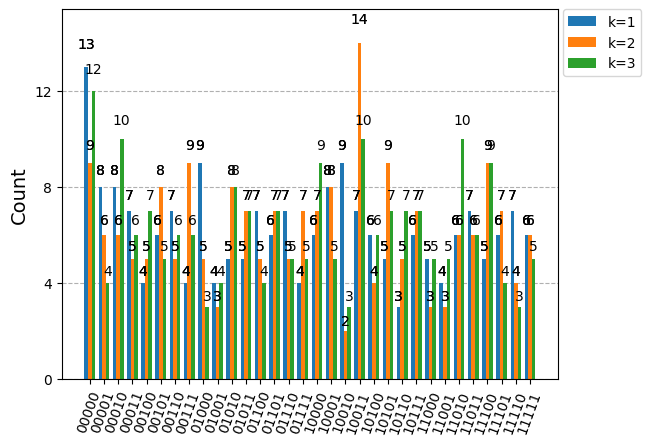

In [21]:
plot_histogram([counts_sim_k1, counts_sim_k2, counts_sim_k3], legend=['k=1', 'k=2', 'k=3'])

The noise is too big - no information left. Probably due to the large depth of the transpiled circuits.

In [ ]:
print("Depth of the transpiled circuit for k=1:")
print(transpiled_k1.depth())
print("Depth of the transpiled circuit for k=2:")
print(transpiled_k2.depth())
print("Depth of the transpiled circuit for k=3:")
print(transpiled_k3.depth())

2243
4659
6973


Trial of a simulation with the real machine (k = 2):

Machine:  ibm_osaka


/var/folders/vd/789tg7yx43v8k0tfrc0g160c0000gn/T/ipykernel_62855/3731552596.py:4: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime.
  job_real_k1 = backend.run(transpiled_k1, shots = 500)


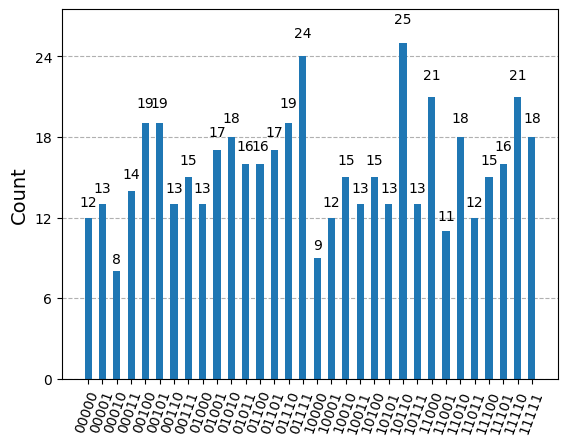

In [40]:
print("Machine: ", backend.name)

transpiled_k1= transpile(Circ_grov_k1, backend)
job_real_k1 = backend.run(transpiled_k1, shots = 500)
res_real_k1 = job_real_k1.result()


plot_histogram(res_real_k1.get_counts())

Even knowing the theoretical perfect output it can not be seen in the histogram. With a transpiled circuit with depth around 4600 that is what one would expect.

Question 5: Using the result found for the first part we know that there are $M=3$ different total states that give $f(x)=1$. As it is a 5 qubits system, the total number of differents states is $N=2^5 = 32$. Once we got $N$ and $M$ we can get $\theta = \arcsin(\sqrt(\frac{M}{N}))\approx = 0.311$rad. We know that applying Grover's operator k times give a state $\ket{\phi} = \sin((2k+1)\theta)\ket{S}+\cos((2k+1)\theta)\ket{P}$, where $\ket{S}$ are the 3 solutions that give $f(x)=1$. We then want to optimize the proba $P=|\ket{s}\bra{\phi}|^2=|\sin((2k+1)\theta)|^2$ of finding a solution. This means we want P=1, then we need to have $(2k+1)\theta=\frac{\pi}{2}\rightarrow k = \frac{\pi-2}{4}\approx 2 $. This result is consistent with the result found with the plots (without any additionnal external noises) 